# Searching Model's Hyperparameters Using Paraphrased Descriptions

In [9]:
import pandas as pd
#from sklearnex import patch_sklearn
#patch_sklearn()

from tqdm.notebook import tqdm_notebook
from tqdm import tqdm
tqdm_notebook.pandas()
import secrets, os
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
ontologyName="Allotrope"

df = pd.read_pickle("Embedded_"+ontologyName+"_SurroundingTexts.pkl")
display(df.info())

tr, tst = train_test_split(df[['EmbD1','EmbD2','EmbD3','EmbPD1','EmbPD2','EmbPD3']], test_size=0.2, shuffle=True)
tr = tr.reset_index().drop(['index'], axis=1)
tst= tst.reset_index().drop(['index'], axis=1)
display(tr.head())
print(tr.shape, tst.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         2893 non-null   int64 
 1   TextD1        2886 non-null   object
 2   TextD2        2888 non-null   object
 3   TextD3        2892 non-null   object
 4   ParaphraseD1  2886 non-null   object
 5   ParaphraseD2  2888 non-null   object
 6   ParaphraseD3  2892 non-null   object
 7   Dataset       2893 non-null   object
 8   EmbD1         2893 non-null   object
 9   EmbD2         2893 non-null   object
 10  EmbD3         2893 non-null   object
 11  EmbPD1        2893 non-null   object
 12  EmbPD2        2893 non-null   object
 13  EmbPD3        2893 non-null   object
 14  EmbLens       2893 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 339.1+ KB


None

EmbD1  \
0  [-0.28094077, -0.5458325, 1.109647, -0.0965691...   
1  [-0.4244934, 1.183792, -0.6317101, 2.2108228, ...   
2  [-2.5720243, 0.10366614, -0.029783458, 0.43654...   
3  [-1.720178, -1.0807407, -0.6333361, 0.25679663...   
4  [-0.7151015, -1.1549029, 1.1392286, 0.452637, ...   

                                               EmbD2  \
0  [0.024025531, -1.0517002, 1.0452582, 0.1155069...   
1  [0.012090508, 0.26422107, -1.1321847, 1.683844...   
2  [-1.3736202, -0.50651425, 0.37607914, 0.374255...   
3  [-1.8141316, -0.4438928, -0.9946206, 0.1765433...   
4  [-1.1705278, -0.25298512, -0.6612753, 0.589069...   

                                               EmbD3  \
0  [-1.37252, -0.83819586, 0.08489928, -0.1237883...   
1  [-1.7976372, 0.58315516, -1.2294291, 1.2712595...   
2  [-1.8112153, -0.8643465, -0.57101804, 0.253997...   
3  [-1.2684402, -0.48100254, -0.40185368, 0.06882...   
4  [-1.1278627, -0.036775492, -0.6208702, 0.41159...   

                                              EmbPD1  \
0  [-1.7362357, 0.5928161, 0.34891734, 1.3671005,...   
1  [-1.581627, 1.680201, -0.30969003, 1.1926246, ...   
2  [-3.3168864, 0.2472985, -0.6306818, 0.8690067,...   
3  [-1.7916442, -0.9238338, -0.48508567, 0.417235...   
4  [-1.1365012, -0.21753658, 0.6392131, 0.6124526...   

                                              EmbPD2  \
0  [-0.35680124, -0.7576086, 1.4000392, 0.3208976...   
1  [-0.7163841, 1.2537308, -0.1751264, 2.6952536,...   
2  [-1.5229566, -0.41574883, 0.2545659, 0.5235017...   
3  [-2.1827133, -0.31480956, -0.48273128, 0.52605...   
4  [-1.6956024, 0.3519096, -0.85280865, 0.8677823...   

                                              EmbPD3  
0  [-1.8196594, -0.40583077, -0.0077431425, 0.199...  
1  [-1.7103469, 1.0253884, -1.539643, 1.2588843, ...  
2  [-2.106266, -0.41721904, -0.753526, 0.3025214,...  
3  [-1.6742827, -0.24251908, -0.29444915, 0.28427...  
4  [-1.5526139, 0.36010775, -0.76039934, 0.598638...

(2314, 6) (579, 6)


In [10]:
def generateDataset(size, df):
    dfn=pd.DataFrame()
    for i in tqdm(range(size)):
        r=secrets.randbelow(df.shape[0])
        r2=secrets.randbelow(df.shape[0])
        s=secrets.randbelow(df.shape[1])
        s2=secrets.randbelow(df.shape[1])
        similar = secrets.randbelow(2)
        if similar or r==r2:
            val = pd.DataFrame(index=[0])
            val['Target'] = True
            val['A'] = [df.iat[r,s]]
            val['B'] = [df.iat[r,s2]]
        else:
            val = pd.DataFrame(index=[0])
            val['Target'] = False
            val['A'] = [df.iat[r,s]]
            val['B'] = [df.iat[r2,s2]]
        dfn=pd.concat([dfn, val], ignore_index=True)
    dfn['Diff'] = dfn['A']-dfn['B']
    return dfn

dftr=generateDataset(8000, tr)
display(dftr.head())
dftst=generateDataset(2000, tst)
display(dftst.head())
display(dftst.describe())

100%|██████████| 8000/8000 [00:13<00:00, 603.71it/s]


Target                                                  A  \
0   False  [-1.4254541, -0.3593779, -1.0747231, -0.032010...   
1    True  [-1.6202691, 0.49143082, -1.5924665, 0.0496756...   
2    True  [-1.0771899, -0.7341314, -0.30613053, 0.127338...   
3    True  [-2.299187, 1.186573, -1.3833783, -0.15845345,...   
4   False  [-2.2360692, -0.79631054, -0.5816979, -0.06265...   

                                                   B  \
0  [-1.5104939, 0.20505005, -1.0288054, -0.545479...   
1  [-1.5406052, 0.55741954, -1.1236025, 0.0489924...   
2  [-1.367283, -0.26985508, -0.33938685, 0.626792...   
3  [-2.8339615, 0.6546655, -1.4292715, 0.04892612...   
4  [-2.25973, 0.055142757, -0.7218754, 0.9081906,...   

                                                Diff  
0  [0.085039735, -0.564428, -0.04591775, 0.513469...  
1  [-0.07966387, -0.06598872, -0.46886396, 0.0006...  
2  [0.29009306, -0.4642763, 0.033256322, -0.49945...  
3  [0.53477454, 0.5319075, 0.045893192, -0.207379...  
4  [0.023660898, -0.8514533, 0.14017755, -0.97084...

100%|██████████| 2000/2000 [00:03<00:00, 622.25it/s]


Target                                                  A  \
0   False  [-1.8106644, -0.49138203, -1.723298, 0.0829209...   
1    True  [-0.22140186, -1.1107428, -1.548079, 1.6742458...   
2   False  [-2.9744732, 0.26410028, 0.536804, 1.4077212, ...   
3    True  [-2.0334947, 0.27944627, -0.20307066, 0.676295...   
4    True  [-1.3676498, 0.67325574, 0.2102883, 0.6889974,...   

                                                   B  \
0  [-2.2091763, -0.38932973, -0.9102254, 0.966883...   
1  [-0.25140452, 0.48801637, -0.80114585, 1.78600...   
2  [-2.1147652, -2.3666656, 0.55510944, 1.0128351...   
3  [-1.4034493, 0.11640583, 0.009312329, 0.354323...   
4  [-1.3676498, 0.67325574, 0.2102883, 0.6889974,...   

                                                Diff  
0  [0.3985119, -0.1020523, -0.81307256, -0.883962...  
1  [0.030002668, -1.5987592, -0.74693316, -0.1117...  
2  [-0.8597081, 2.630766, -0.01830542, 0.39488602...  
3  [-0.6300454, 0.16304044, -0.21238299, 0.321971...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

Target                                                  A  \
count    2000                                               2000   
unique      2                                               1524   
top     False  [-1.7298902, 1.007585, 0.5656667, 3.0878525, 3...   
freq     1030                                                  4   

                                                        B  \
count                                                2000   
unique                                               1515   
top     [-1.0229493, -0.92854875, 0.29615438, 0.833091...   
freq                                                    4   

                                                     Diff  
count                                                2000  
unique                                               2000  
top     [0.3985119, -0.1020523, -0.81307256, -0.883962...  
freq                                                    1

Train: 8000  Test: 2000


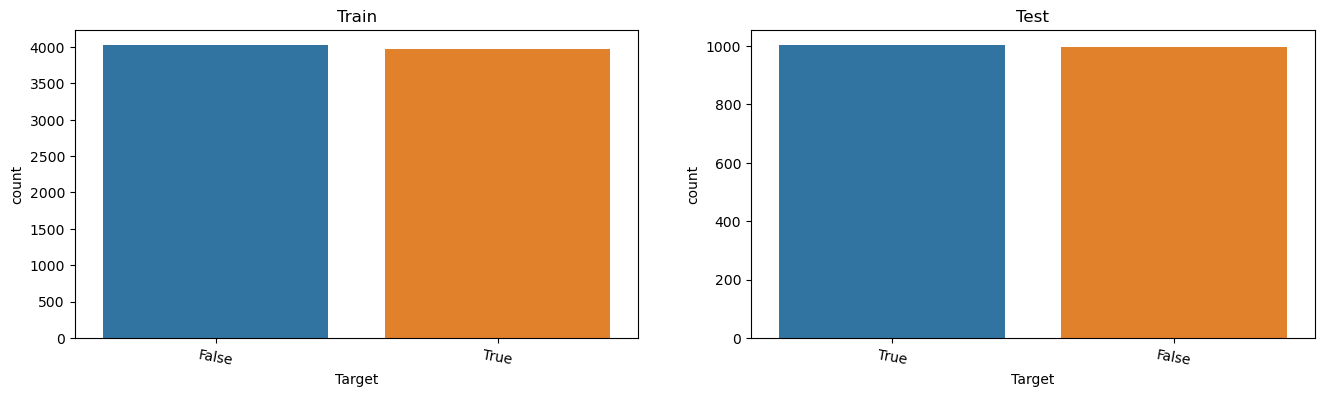

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(16.0, 4.0))
ax = sns.countplot(x='Target', data=dftr, ax=axs[0], order=dftr["Target"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-10)
ax.set(title='Train')
ax2 = sns.countplot(x='Target', data=dftst, ax=axs[1], order=dftst["Target"].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-10)
ax2.set(title='Test')

print("Train:",len(dftr)," Test:",len(dftst))

Train: 7934  Test: 1990


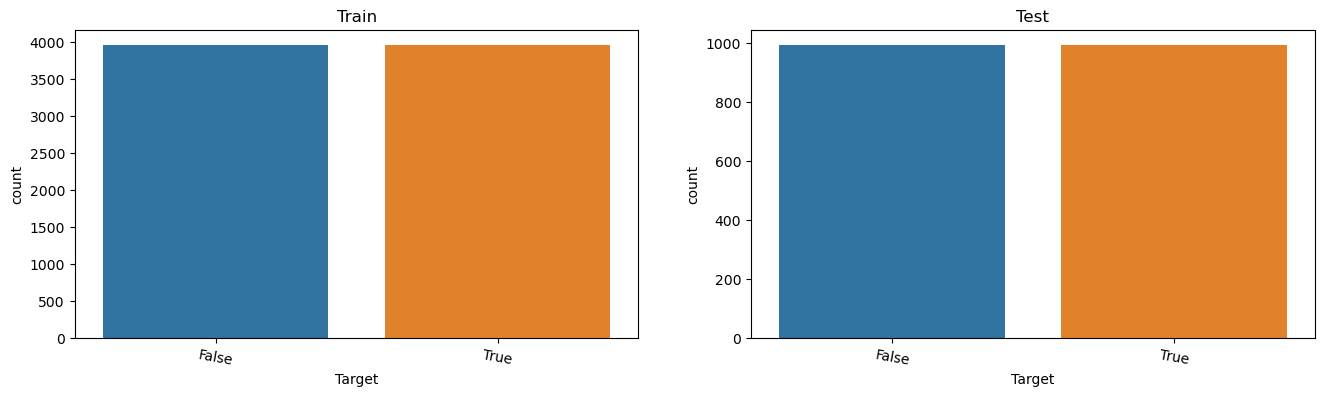

In [5]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X = list(dftr["Diff"]), y = list(dftr["Target"]))
X_test, y_test = rus.fit_resample(X = list(dftst["Diff"]), y = list(dftst["Target"]))

fig, axs = plt.subplots(1,2, figsize=(16.0, 4.0))
ax = sns.countplot(x='Target', data=pd.DataFrame(y_train, columns = ['Target']), ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=-10)
ax.set(title='Train')
ax2 = sns.countplot(x='Target', data=pd.DataFrame(y_test, columns = ['Target']), ax=axs[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-10)
ax2.set(title='Test')

print("Train:",len(y_train)," Test:",len(y_test))

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as metrics

print(dftr["Target"].head(), "\n", dftr["Diff"].head())
print(len(X_train) == len(y_train), len(y_train))

os.cpu_count()-1

0    False
1     True
2     True
3    False
4    False
Name: Target, dtype: bool 
 0    [1.6079073, -0.15390012, 1.0327873, -0.3568235...
1    [-0.76954174, 1.1112233, -0.61668, 0.095729366...
2    [1.8511833, 0.6654038, 1.0117158, -1.2463989, ...
3    [-1.3805777, -2.5709343, 0.63370866, -0.758208...
4    [-0.51099133, -0.3435351, -0.14176437, 0.86856...
Name: Diff, dtype: object
True 7934


7

In [13]:
from pactools.grid_search import GridSearchCVProgressBar

def gridSearcher(model, params, metric, X_train, y_train, X_test, y_test):
    m = GridSearchCV(estimator=model(), param_grid=params, scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'],
                        refit = metric, n_jobs=os.cpu_count()-1, cv=3, verbose=10)
    m.fit(X = X_train, y = y_train)
    print(m.best_params_)
    print(m.best_score_)
    print(m.best_estimator_)

    result = model(**m.best_params_).fit(X = X_train, y = y_train)
    print('Accuracy-train: {0:.2f}%'.format(metrics.accuracy_score(y_train, result.predict(X_train))*100))
    print('Accuracy-test: {0:.2f}%'.format(metrics.accuracy_score(y_test, result.predict(X_test))*100))
    return result

In [12]:
%%time
from sklearn.ensemble import RandomForestClassifier as rfc

paramsRFC = {
    'max_depth': range(3, 12, 2),
    'min_samples_split': [5],
    'criterion': ['entropy', 'gini'],
    'n_estimators': range(50, 300, 50),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [False, True],
}

mrfc = gridSearcher(rfc, paramsRFC, 'precision', X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


KeyboardInterrupt: 

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier as gbc
paramsGBC = {
    'max_depth': range(3, 12, 2),
    'learning_rate': [0.05, 0.1, 0.2],
    'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': range(50, 300, 100),
    'max_features': ['sqrt', 'log2'],
}

mgbc = gridSearcher(gbc, paramsGBC, 'precision', X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

In [ ]:
%%time
from sklearn import datasets, svm
paramsSVMC = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'sigmoid', 'poly']},
]

msvm = gridSearcher(svm.SVC, paramsSVMC, 'precision', X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

In [ ]:
%%time
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, RationalQuadratic, WhiteKernel

paramsGPC = [
    { "kernel": [RBF(l) for l in np.logspace(-1, 1, 2)] },
    { "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, 2)] },    
    { "kernel": [1*Matern(), 1*RationalQuadratic(), 1*WhiteKernel() ] },
    { "kernel": [1.0 * RBF(1.0)], "random_state": [0, 50] },    
]

mgpc = gridSearcher(GaussianProcessClassifier, paramsGPC, 'precision', X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

#mgpc.predict_proba(X[:2,:])

In [ ]:
%%time
from sklearn.decomposition import PCA
pca = PCA(200)

fpca = pca.fit(X = X_train)
xtrainpca = fpca.transform(X = X_train)
xtestpca = fpca.transform(X = X_test)
print(len(xtrainpca), "out=", len(xtrainpca[500]), xtrainpca[500][-1])
print(len(np.array(X_train)[0]), np.array(X_train).shape)

print(len(xtestpca), "out=", len(xtestpca[100]), xtestpca[100][-1])
print(len(np.array(X_test)[0]), np.array(X_test).shape)

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier as knn
print(knn().get_params().keys())
paramsKNN = {
    'n_neighbors': range(3, 12, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'p': [1, 2, 3, 4],
}

mknn = gridSearcher(knn, paramsKNN, 'precision', X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

paramsMLPC = {
    'random_state': [0, 1],
    'max_iter': [500, 1000],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(16,),(32,),(64,),(128,),(256,),(512,)],
    'alpha': np.logspace(-5, 3, 5)
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

mgpc = gridSearcher(MLPClassifier, paramsMLPC, 'precision', X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)